# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Yapıcıoğlu

Student name: Fatıma Rabia
    
ID: 2049536

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2049536
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [70 50 54 56 59 61 73 71 57 49]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


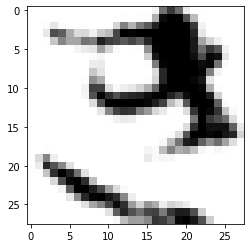

LABEL: 1
INPUT:


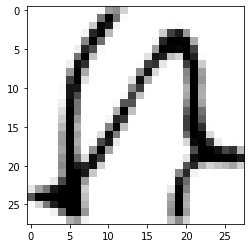

LABEL: 8
INPUT:


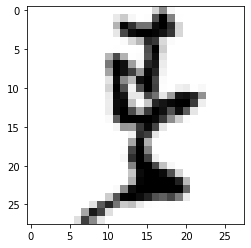

LABEL: 2
INPUT:


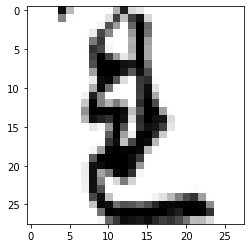

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [9]:
# ADD YOUR CODE
print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(clf.best_params_)

print("Best estimator found:")
# ADD YOUR CODE
print(clf.best_estimator_)


print("Score with best parameters:")

# ADD YOUR CODE
clf = GridSearchCV(svc, parameters,refit=True,cv=5)
clf.fit(X_train, y_train)
print(clf.best_score_)

import pandas as pd

print("All scores on the grid:")

# ADD YOUR CODE
all_scores = pd.DataFrame(clf.cv_results_)

all_scores

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Best estimator found:
SVC(C=0.01, kernel='linear')
Score with best parameters:
0.7166666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038201,0.002653,0.008215,0.000623,0.01,{'C': 0.01},0.725,0.7,0.741667,0.700000,0.716667,0.716667,0.015811,1
1,0.039197,0.002845,0.008282,0.000815,0.1,{'C': 0.1},0.725,0.7,0.733333,0.675000,0.650000,0.696667,0.031002,2
2,0.039657,0.003461,0.008770,0.001278,1,{'C': 1},0.725,0.7,0.725000,0.666667,0.650000,0.693333,0.030459,3
3,0.040218,0.002972,0.007588,0.000751,10,{'C': 10},0.725,0.7,0.725000,0.666667,0.650000,0.693333,0.030459,3


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

# ADD YOUR CODE

grid = GridSearchCV(SVC(kernel='poly',degree=2),parameters,refit=True)
grid.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(grid.best_params_)

print("Best estimator found:")
# ADD YOUR CODE
print(grid.best_estimator_)

print("Score with best parameters:")
# ADD YOUR CODE
print(grid.best_score_)

import pandas as pd

print("All scores on the grid:")

# ADD YOUR CODE
all_scores = pd.DataFrame(grid.cv_results_)

all_scores

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Best estimator found:
SVC(C=0.01, degree=2, gamma=1, kernel='poly')
Score with best parameters:
0.7416666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056279,0.004684,0.009220,0.000667,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.125000,0.125000,0.116667,0.116667,0.125000,0.121667,0.004082,9
1,0.046655,0.002931,0.009411,0.000570,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.741667,0.716667,0.741667,0.733333,0.716667,0.730000,0.011304,6
2,0.051612,0.004739,0.009280,0.000772,0.01,1,"{'C': 0.01, 'gamma': 1}",0.733333,0.716667,0.758333,0.741667,0.758333,0.741667,0.015811,1
3,0.058121,0.004134,0.010436,0.001716,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.491667,0.383333,0.533333,0.416667,0.475000,0.460000,0.053593,8
4,0.048782,0.004072,0.008505,0.001090,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.725000,0.725000,0.750000,0.733333,0.741667,0.735000,0.009718,5
5,0.046493,0.005530,0.008261,0.000807,0.1,1,"{'C': 0.1, 'gamma': 1}",0.733333,0.716667,0.758333,0.741667,0.758333,0.741667,0.015811,1
6,0.046411,0.005742,0.008888,0.000589,1,0.01,"{'C': 1, 'gamma': 0.01}",0.741667,0.716667,0.741667,0.733333,0.716667,0.730000,0.011304,6
7,0.049189,0.001838,0.008058,0.000868,1,0.1,"{'C': 1, 'gamma': 0.1}",0.733333,0.716667,0.758333,0.741667,0.758333,0.741667,0.015811,1
8,0.050697,0.003113,0.008096,0.000803,1,1,"{'C': 1, 'gamma': 1}",0.733333,0.716667,0.758333,0.741667,0.758333,0.741667,0.015811,1


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

grid = GridSearchCV(SVC(kernel='poly',degree=3),parameters,refit=True)
grid.fit(X_train,y_train)


print("Best parameters set found:")
# ADD YOUR CODE
print(grid.best_params_)

print("Best estimator found:")
# ADD YOUR CODE
print(grid.best_estimator_)

print("Score with best parameters:")
# ADD YOUR CODE
print(grid.best_score_)

import pandas as pd

print("All scores on the grid:")

# ADD YOUR CODE
all_scores = pd.DataFrame(grid.cv_results_)

all_scores

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Best estimator found:
SVC(C=0.01, gamma=0.1, kernel='poly')
Score with best parameters:
0.7066666666666668
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058194,0.002518,0.009204,0.000665,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.125000,0.125000,0.116667,0.116667,0.125000,0.121667,0.004082,9
1,0.053965,0.005032,0.008412,0.000584,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.666667,0.683333,0.758333,0.716667,0.708333,0.706667,0.031358,1
2,0.053765,0.004897,0.008437,0.000844,0.01,1,"{'C': 0.01, 'gamma': 1}",0.708333,0.658333,0.725000,0.683333,0.708333,0.696667,0.023333,2
3,0.056189,0.001893,0.010461,0.002107,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.416667,0.358333,0.466667,0.366667,0.383333,0.398333,0.039581,8
4,0.055442,0.003718,0.008729,0.000637,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.708333,0.658333,0.725000,0.683333,0.708333,0.696667,0.023333,2
5,0.055772,0.003417,0.008438,0.000739,0.1,1,"{'C': 0.1, 'gamma': 1}",0.708333,0.658333,0.725000,0.683333,0.708333,0.696667,0.023333,2
6,0.049097,0.004889,0.007975,0.000475,1,0.01,"{'C': 1, 'gamma': 0.01}",0.675000,0.675000,0.725000,0.683333,0.708333,0.693333,0.020000,7
7,0.051455,0.004670,0.007971,0.000869,1,0.1,"{'C': 1, 'gamma': 0.1}",0.708333,0.658333,0.725000,0.683333,0.708333,0.696667,0.023333,2
8,0.055096,0.004551,0.008139,0.000881,1,1,"{'C': 1, 'gamma': 1}",0.708333,0.658333,0.725000,0.683333,0.708333,0.696667,0.023333,2


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
grid = GridSearchCV(SVC(kernel='rbf',degree=3),parameters,refit=True)
grid.fit(X_train,y_train)

print("Best parameters set found:")
# ADD YOUR CODE
print(grid.best_params_)

print("Best estimator found:")
# ADD YOUR CODE
print(grid.best_estimator_)

print("Score with best parameters:")
# ADD YOUR CODE
print(grid.best_score_)



print("All scores on the grid:")

# ADD YOUR CODE
all_scores = pd.DataFrame(grid.cv_results_)

all_scores

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Best estimator found:
SVC(C=10, gamma=0.01)
Score with best parameters:
0.7833333333333333
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066775,0.001259,0.025793,0.001046,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.125000,0.125000,0.116667,0.116667,0.125000,0.121667,0.004082,11
1,0.064720,0.004288,0.026310,0.006392,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.241667,0.233333,0.216667,0.275000,0.225000,0.238333,0.020138,7
2,0.071662,0.009104,0.025657,0.000820,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.125000,0.125000,0.116667,0.116667,0.125000,0.121667,0.004082,11
3,0.073364,0.003300,0.025600,0.002812,0.1,1,"{'C': 0.1, 'gamma': 1}",0.125000,0.125000,0.116667,0.116667,0.125000,0.121667,0.004082,11
4,0.052801,0.004041,0.023981,0.002283,1,0.001,"{'C': 1, 'gamma': 0.001}",0.558333,0.600000,0.608333,0.550000,0.633333,0.590000,0.031358,6
5,0.063514,0.004337,0.024735,0.001972,1,0.01,"{'C': 1, 'gamma': 0.01}",0.791667,0.741667,0.783333,0.791667,0.741667,0.770000,0.023333,3
6,0.074622,0.004256,0.025376,0.001507,1,0.1,"{'C': 1, 'gamma': 0.1}",0.191667,0.200000,0.141667,0.133333,0.225000,0.178333,0.035198,10
7,0.069426,0.004312,0.024420,0.003068,1,1,"{'C': 1, 'gamma': 1}",0.125000,0.125000,0.116667,0.116667,0.125000,0.121667,0.004082,11
8,0.043956,0.003567,0.023031,0.000976,10,0.001,"{'C': 10, 'gamma': 0.001}",0.775000,0.725000,0.766667,0.716667,0.716667,0.740000,0.025495,4
9,0.065935,0.003981,0.022131,0.001883,10,0.01,"{'C': 10, 'gamma': 0.01}",0.808333,0.775000,0.783333,0.783333,0.766667,0.783333,0.013944,1


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

I observed that the model which provides highest score with the best parameters is the one with 'rbf' kernel. Polynomial kernel degree=2 SVM has performed better than the linear one and the polynomial degree=3 one. When we use the polynomial kernel, we need to find optimum degree in order not to overshoot the minumum loss or in order not to overfit to data, which then leads to a model not generalized well. GridSearchCV method applies both cross-validation and different combination of parameters that we provided. C is the regularization parameter. The strength of the regularization is inversely proportional to C. The model which has performed best has tuned C as 10. Gamma is the kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. The best performed model that I observed has tuned the gamma as 0.01. This combination on the paramer grid provides the overall best performance among the ones that I've computed above.









## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
best_SVM = SVC( kernel='rbf', degree=3, C=10, gamma=0.01)

# ADD YOUR CODE
best_SVM.fit(X_train,y_train)

training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.190000


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [14]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


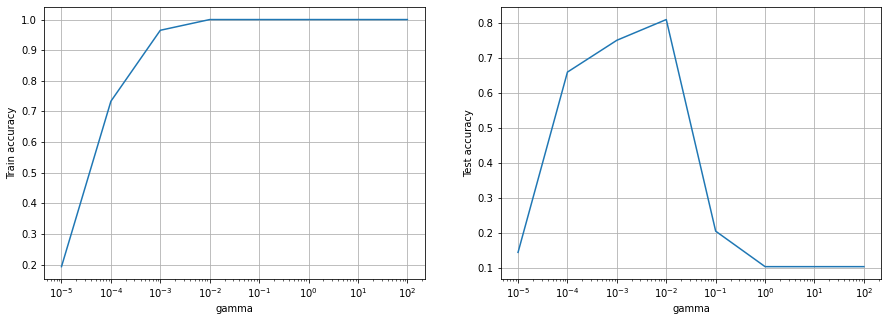

In [15]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for i in range(len(gamma_values)):
    best_SVM = SVC( kernel='rbf', degree=3, C=10, gamma=gamma_values[i])
    best_SVM.fit(X_train,y_train)
    training_accuracy = best_SVM.score(X_train,y_train)
    test_accuracy = best_SVM.score(X_test,y_test)
    train_acc_list.append(training_accuracy)
    test_acc_list.append(test_accuracy)
    
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Until the gamma value reaches 0.01 both the training accuracy and the test accuracy increased. Once it may seem like when gamma increases the training accuracy and the test accuracy seem to be increasing, but this assumption is wrong. Because as it can be seen from the plot after 0.01 test accuracy started to decrese even though the training accuracy is stable and provides %100 accuracy. This means that if the training accuracy provides good accuracy results despite the fact that test accuracy is decreasing, the model will overfit starting from that point. Therefore as an optimal gamma value we can take 0.01 in order not to overfit dataset and generalize better.




## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [178 223 188 192 202 198 207 207 204 201]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [17]:
#get training and test error for the best SVM model from CV

best_SVM = SVC( kernel='rbf', degree=3, C=10, gamma=0.01)
best_SVM.fit(X_train,y_train)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.116897


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [18]:
from sklearn import linear_model

# ADD YOUR CODE
lr = linear_model.LogisticRegression( random_state=0, C=100000, max_iter=500 ).fit(X_train, y_train)
training_error = 1- lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.281086


## TO DO 9 Try  with regularization (use C=1)¶

In [19]:
# ADD YOUR CODE

lr = linear_model.LogisticRegression( random_state=0, C=1, max_iter=500 ).fit(X_train, y_train)
training_error = 1- lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.000500
Best regularized logistic regression test error: 0.255793


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

When I trained the SVM model with m=2000 training data points I observed better generalization performance of my model than I observed when I train my model with m= 600. SVM test error reduced to 0.11 which was on average between 0.3 - 0.4 range. Logistic Regression model test error was 0.28 before regularization and after the regularization the it reduced to 0.25. This may seem like a slight difference but training models with much more training samples or high number of data with the regularization, the models are tended to produce better training and test accuracies. Also training with more data is important from the perspective of generalization, when the model encountered with a out sample data which is a sample the model has not encountered before, the model will be able make better predictions.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [20]:
X_test[500,:].shape

(784,)

Logistic Regression Prediction:  [3] true label:  4
SVM Prediction:  [4] true label:  4


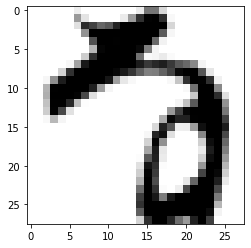

In [21]:
sample_index = 500

X = X_test[sample_index,:].reshape(-1,1)
X = X.reshape(1,784)
LR_prediction = lr.predict(X)
print('Logistic Regression Prediction: ', LR_prediction, 'true label: ', y_test[sample_index])

SVM_prediction = best_SVM.predict(X)
print('SVM Prediction: ', SVM_prediction, 'true label: ', y_test[sample_index])

plt.imshow( X.reshape(28,28), cmap = plt.cm.gray_r, interpolation = "nearest")
plt.show()

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True, floatmode='fixed') # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

y_pred_svm = best_SVM.predict(X_test)
confusion_SVM = confusion_matrix(y_test,y_pred_svm)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

y_pred_lr =  lr.predict(X_test)
confusion_LR = confusion_matrix(y_test,y_pred_lr)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5822 5777 5812 5808 5798 5802 5793 5793 5796 5799]

 Confusion matrix SVM  
 
 [[5314    8    8   27  139   69    8   78  131   40]
 [  17 5081  137   50  119   14  128    3   89  139]
 [   0  104 4689  131   64   28  450   18  233   95]
 [  10  115  124 5264   55   60   16   21  133   10]
 [ 118  131  116   36 5059   15   78   40   98  107]
 [  41   75  153  179   31 5154   58   12   84   15]
 [   9  156  306   32  175   16 4986   33   48   32]
 [  63   14   56   48  180   33  106 5187   68   38]
 [  18  134  108   51   17   55  137    3 5251   22]
 [  14  153  178   30   88   15   17   11   58 5235]]

 Confusion matrix SVM (normalized)   
 
 [[0.91 0.00 0.00 0.00 0.02 0.01 0.00 0.01 0.02 0.01]
 [0.00 0.88 0.02 0.01 0.02 0.00 0.02 0.00 0.02 0.02]
 [0.00 0.02 0.81 0.02 0.01 0.00 0.08 0.00 0.04 0.02]
 [0.00 0.02 0.02 0.91 0.01 0.01 0.00 0.00 0.02 0.00]
 [0.02 0.02 0.02 0.01 0.87 0.00 0.01 0.01 0.02 0.02]
 [0.01 0.01 0.03 0.03 0.01 0.89 0.01 0.00 0.0

In [23]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
y_pred_svm = best_SVM.predict(X_test)
confusion_SVM = confusion_matrix(y_test,y_pred_svm, normalize='all')
print("\n Confusion matrix SVM  \n \n", confusion_SVM)


y_pred_lr =  lr.predict(X_test)
confusion_LR = confusion_matrix(y_test,y_pred_lr, normalize = 'all')
print("\n Confusion matrix LR  \n \n", confusion_LR)



 Confusion matrix SVM  
 
 [[0.09 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.09 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.08 0.00 0.00 0.00 0.01 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.09 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.09 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.09 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.01 0.00 0.00 0.00 0.09 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09]]

 Confusion matrix LR  
 
 [[0.08 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.07 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.01]
 [0.00 0.01 0.06 0.00 0.00 0.00 0.01 0.00 0.01 0.01]
 [0.00 0.00 0.00 0.07 0.00 0.01 0.00 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.00 0.07 0.00 0.00 0.00 0.00 0.01]
 [0.00 0.00 0.00 0.00 0.00 0.08 0.00 0.00 0.00 0.00]
 [0.00 0.01 0.01 0.00 0.00 0.00 0.07 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Obtained higher accuracies demonstrate that the model is good at classifying this classes. If the model has classified great number of test data as correct than the accuracy will be high in the confusion matrix for this class. But this is correct only in the diagonal. Because diagonal matches consist of exact matches like prediction is 1, and the correctl label is 1, or prediction is 2 and the correct label is 2, and so on. Therefore if diagonal consist of high values this is a good sign for the model performance in terms of classification predictions. On the other hand, the cells other than the diagonals should have low values so that the wrong predictions would be less. Other cells introduce the performance of the different class matches, for instance, prediction is 1, and the correct label is 2. The cell in this match introduce the how many confusions or wrong predictions that the model have made. Observing the confusion matrix we can make significant extractions in order to find at which points is our model in confusion, and from there we can take some measures, for instance adding some more samples belong to this class. 